In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import seaborn as sns
from sklearn import svm

In [14]:
df = pd.read_excel("C:/Users/rosha/Downloads/Copy of loan.xlsx")

In [15]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [17]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

TypeError: 'Axes' object is not subscriptable

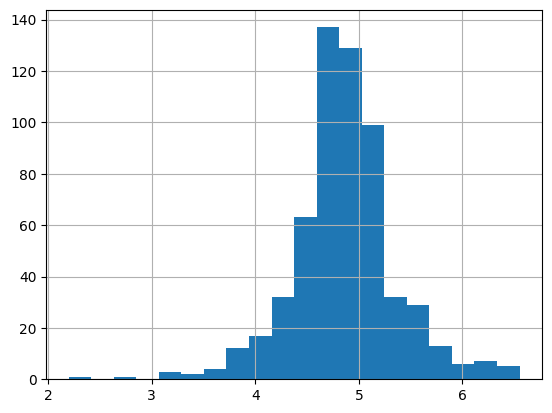

In [18]:
df['loan_amount_log'] = np.log(df['LoanAmount'])
df['loan_amount_log'].hist(bins=20) [00:10:50]

<Axes: >

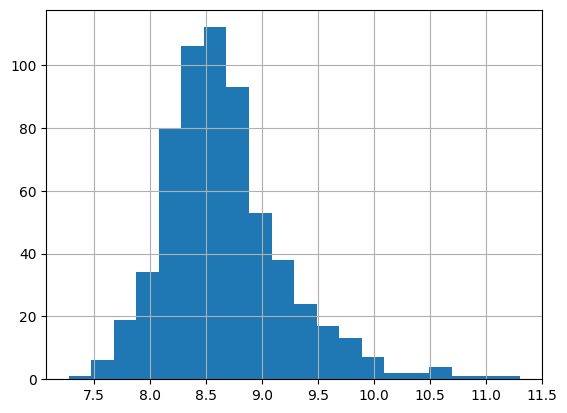

In [20]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])
df['TotalIncome_log'].hist(bins=20)

In [22]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True) 

In [23]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())
df.loan_amount_log = df.loan_amount_log.fillna(df.loan_amount_log.mean())

In [24]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)
df.isnull().sum() # Verify no missing values remain [00:18:06]

C:\Users\rosha\AppData\Local\Temp\ipykernel_10580\1721262657.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)


Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
loan_amount_log       0
TotalIncome           0
TotalIncome_log       0
dtype: int64

In [25]:
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values [00:19:13]

In [27]:
from sklearn.model_selection import train_test_split

# Define features and target correctly
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

# Now split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0
)

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [32]:
# Selecting specific columns for X (features) and y (target)
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values
y = df.iloc[:, 12].values [00:19:13]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

# Encoding categorical data for Training set
for i in range(0, 5):
    X_train[:, i] = labelencoder_X.fit_transform(X_train[:, i])
X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])

# Encoding categorical data for Testing set
for i in range(0, 5):
    X_test[:, i] = labelencoder_X.fit_transform(X_test[:, i])
X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

# Label Encoding the target variable
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test) [00:38:05]

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (3252052257.py, line 30)

In [40]:
# Replace '3+' with the number 3 and convert the column to numeric
df['Dependents'] = df['Dependents'].replace('3+', 3)

# Convert the column to float or int (handling any potential NaN values)
df['Dependents'] = pd.to_numeric(df['Dependents'], errors='coerce')

# Optional: Fill NaNs if they were created during conversion
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

C:\Users\rosha\AppData\Local\Temp\ipykernel_10580\1397806065.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)


In [38]:
# Convert '3+' to 3
df['Dependents'] = df['Dependents'].replace('3+', 3)

# Convert column to integer type
df['Dependents'] = df['Dependents'].astype(int)

C:\Users\rosha\AppData\Local\Temp\ipykernel_10580\1982167023.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Dependents'] = df['Dependents'].replace('3+', 3)


In [39]:
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status']

In [45]:
from sklearn.preprocessing import LabelEncoder

# 1. Handle the '3+' and Missing Values (from previous steps)
df['Dependents'] = df['Dependents'].replace('3+', 3)
df['Dependents'] = df['Dependents'].fillna(df['Dependents'].mode()[0])
df['Gender'] = df['Gender'].fillna(df['Gender'].mode()[0])
df['Married'] = df['Married'].fillna(df['Married'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

# 2. Label Encode Categorical Columns
# List of columns that contain strings
cat_columns = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']

le = LabelEncoder()
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

# 3. RE-DEFINE X and y (Crucial: This captures the new numbers)
# Using the column indices from the video
X = df.iloc[:, np.r_[1:5, 9:11, 13:15]].values 
y = df.iloc[:, 12].values

# 4. RE-SPLIT the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# 5. NOW fit the model
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train) # This will work now!

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the curre

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

# Remove the [00:47:42] from the end
print("Accuracy of decision tree is", metrics.accuracy_score(y_test, y_pred))

Accuracy of decision tree is 0.6422764227642277
